# **CyberBullying Detections on Social Media**

### Student Name: Kavinilavan Muthukumar
### Student Number: W9505534
### Supervisor Name: Ismail Kazmi
### Module Name: Computing Masters Project

Aim: -
The purpose of this study is to identify
cyberbullying tweets in social media with high accuracy using a
hybrid model (CNN-LSTM). Also, this study proves that the hybrid
models outperform all conservative models such as RNN, LSTM,
and GRU. The twitter cyberbullying dataset is used in this study for
experiments. 

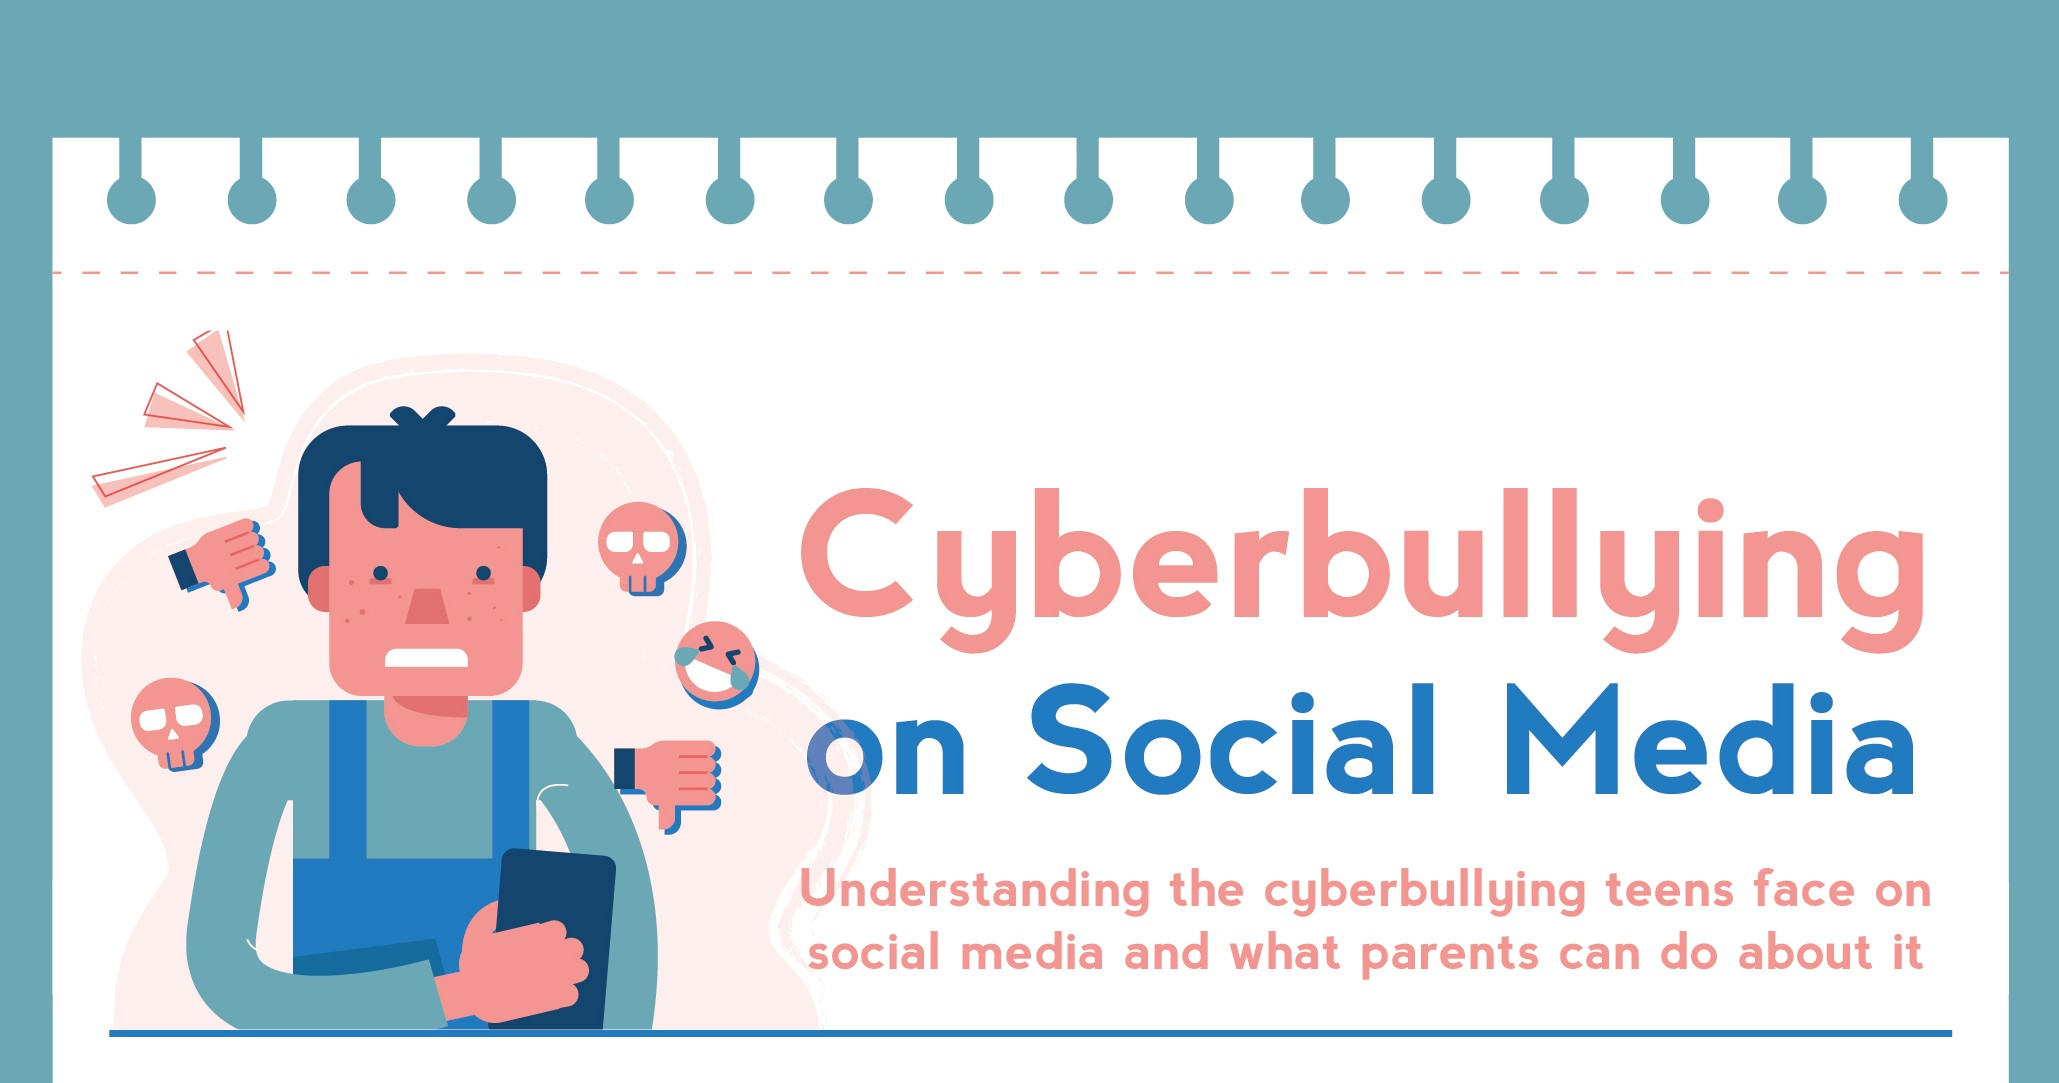

## GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12965599202370059573
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12601262282133093651
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

## Loading the Data

In [ ]:
# mount the google drive for accessing the data
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# read the data
import pandas as pd # pandas for data manupulation and loading
data=pd.read_csv("/content/drive/MyDrive/data/cyberbullying_tweets.csv")

In [ ]:
data.head()# showing the data

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
data.info() # getting information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
data["tweet_text"].duplicated().sum()# finding the duplicates

1686

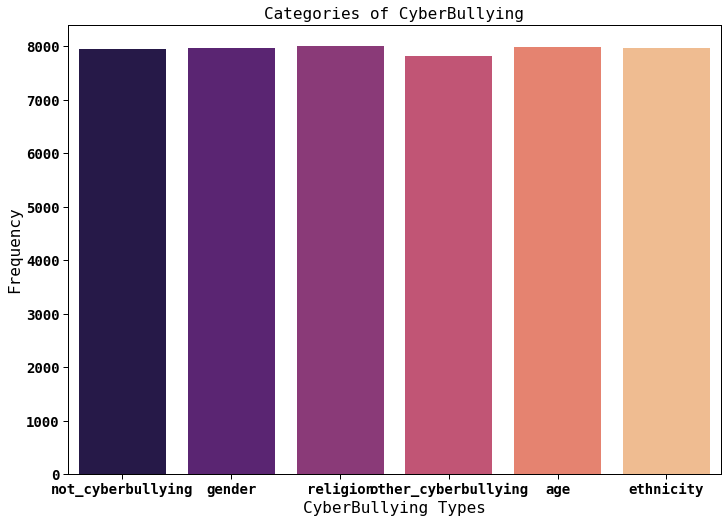

In [ ]:
# countplot for target variable 
# it is useful for checking the data wheather it is balanced or not
import matplotlib.pyplot as plt # data vizualization
import seaborn as sns # data vizualization
from matplotlib import rcParams # fig size
rcParams['figure.figsize'] = 11.7,8.27 # fig size
sns.set_context('paper') 
sns.countplot(x = 'cyberbullying_type', data = data, palette = 'magma') # countplot
plt.title('Categories of CyberBullying', fontsize=16) # title 
plt.xlabel('CyberBullying Types', fontsize=16); # x label
plt.ylabel('Frequency', fontsize=16); # y label
plt.tick_params(axis='both', which='major', labelsize=14) # for labels of axis
plt.show() # call for plot

## Data Pre-processing

#### Removing Names and Mentions

In [ ]:
# removing all the mention and names
data['text'] = data['tweet_text'].apply(lambda x: ' '.join([tweet for tweet in x.split() if not tweet.startswith('@')])) # removing the words start with @
data['text'] = data['text'].apply(lambda x: ' '.join([tweet for tweet in x.split() if not tweet.startswith('#')]))# removing the words start with #

In [ ]:
data.head() # newly created columns with no mentions and names

,tweet_text,cyberbullying_type,text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,In other words your food was crapilicious!
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is so white?
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,a classy whore? Or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"meh. :P thanks for the heads up, but not too c..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,This is an ISIS account pretending to be a Kur...


#### Removing Punctuations

In [ ]:
# removing puncuations 
import string
symbols = string.punctuation
symbols

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_symbols(text):
  no_symbols ="".join([i for i in text if i not in symbols])# if any symbols found in text, it will remove it
  return no_symbols

In [ ]:
data['text']= data['text'].apply(lambda x:remove_symbols(x))


#### Lowering the words

In [ ]:
 # lowering the upper case letter because python is case sensitive
data['text']= data['text'].apply(lambda x: x.lower())

#### Handling Contractions

In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# function for contraction 
# package for contraction removel 
# for instance can't to change into can not
def contra(text):
  import contractions
  output = contractions.fix(text)
  return output

data['text']= data['text'].apply(lambda x: contra(x))# calling the above function here

#### Removing Repeated Words

In [ ]:
# cleaning and removing repeating characters
import re
def remove_repeated(text):
    return re.sub(r'(.)1+', r'1', text)

data['text'] = data['text'].apply(lambda x: remove_repeated(x)) # calling the function 

#### Removing Multiple Spaces

In [ ]:
# function for removing multiple space in the text 
import re
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

data['text'] = data['text'].apply(lambda x: remove_mult_spaces(x)) # calling the function here

#### Removing URL

In [ ]:
# removing the url http and https 
data['text'] = data['text'].apply(lambda x: ' '.join([tweet for tweet in x.split() if not tweet.startswith('http')]))
data['text'] = data['text'].apply(lambda x: ' '.join([tweet for tweet in x.split() if not tweet.startswith('https')]))

In [ ]:
data.text[2464]# checking the sample text 

'anyone have tips as to how i can get out of school mode i am at it with the wine and physics book againand a math book these s are hard'

#### Removing Stopwords

In [ ]:
# stopwords is nothing but unimportant words to predict the output
# for instance, the, a, is, an, in and so on.

In [ ]:
import nltk # nltk for text pre processing 
from nltk.stem import PorterStemmer 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def remove_stopwords(text):
  removed_word = [word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(removed_word)

In [ ]:
data["text"]= data.text.map(remove_stopwords)

#### Remove Special Characters

In [ ]:
# removing special characters in the text for example emoji 
def remove_spechar(text):
  import re
  text = re.sub(r"[^a-z0-9]"," ",text.lower())
  return text

In [ ]:
data["text"]= data["text"].apply(lambda x:  remove_spechar(x))

#### Vocabulary Size

In [ ]:
# calculating the total number of unique vocabulary in the data
# it is necessary while building the model 
from collections import Counter
def count_words(text):
  count=Counter()
  for i in text.values:
    for word in i.split():
      count[word] += 1
  return count

counter = count_words(data.text)

In [ ]:
len(counter)

46985

In [ ]:
counter.most_common(5)# most frequent words in our vocabulary list 

[('school', 8711),
 ('like', 5831),
 ('fuck', 5801),
 ('people', 5407),
 ('dumb', 5333)]

In [ ]:
vocab_size=len(counter)

## Data Exploration

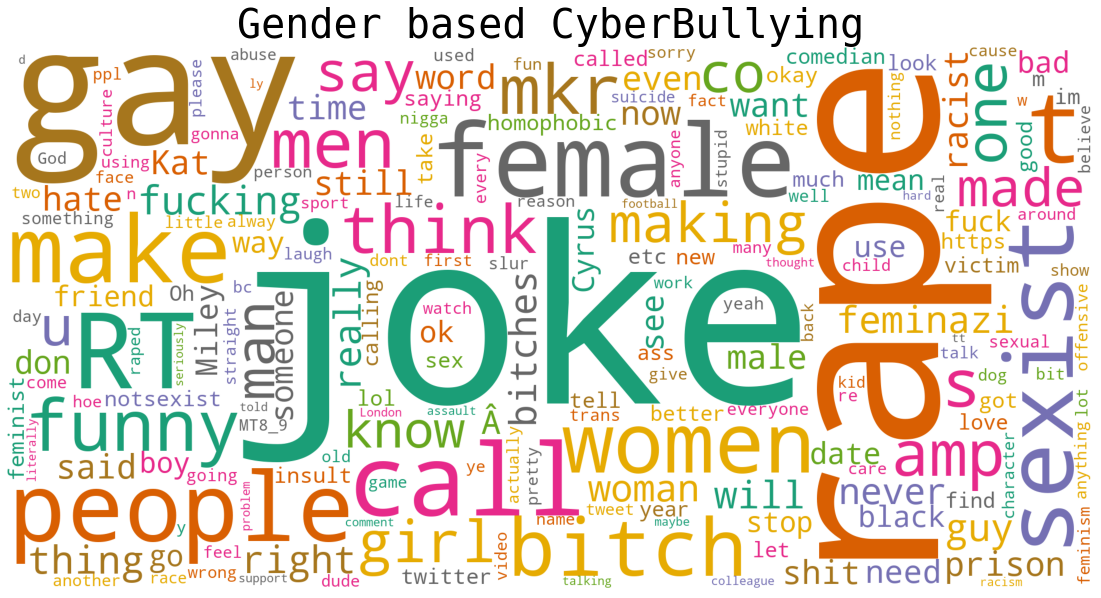

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
plt.figure(figsize=(20,10))
subset = data[data['cyberbullying_type']=='gender']
text_of_gender = subset.tweet_text.values
word_cloud=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2001,height=1001).generate(" ".join(text_of_gender))
plt.axis('off')
plt.title("Gender based CyberBullying",fontsize=40)
plt.imshow(word_cloud)

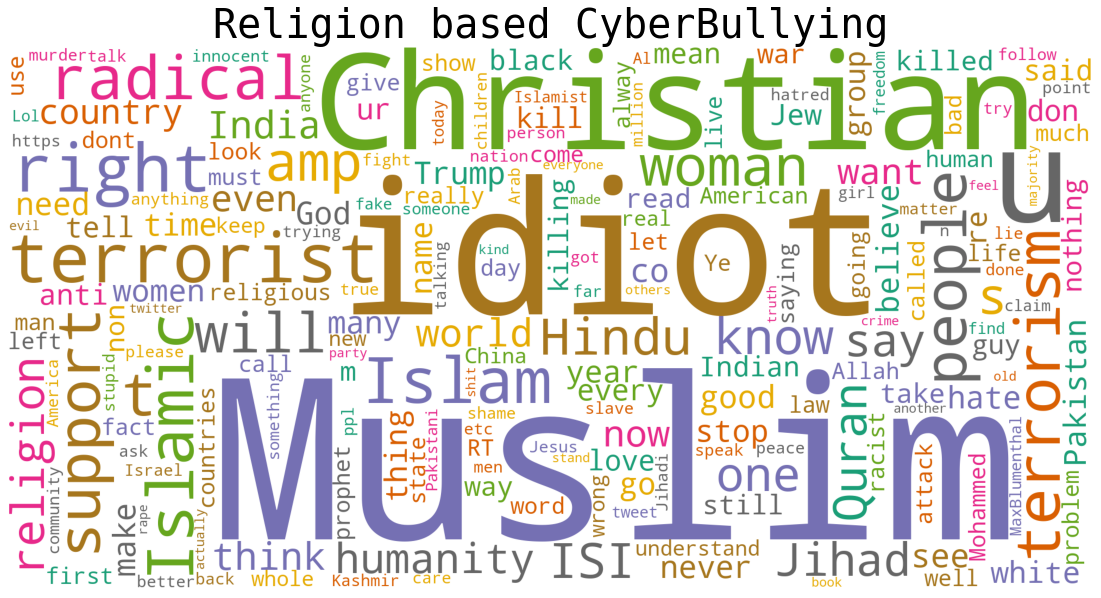

In [ ]:
plt.figure(figsize=(20,10))
subset_religion = data[data['cyberbullying_type']=='religion']
text_of_religion = subset_religion.tweet_text.values
word_cloud=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2001,height=1001).generate(" ".join(text_of_religion))
plt.axis('off')
plt.title("Religion based CyberBullying",fontsize=40)
plt.imshow(word_cloud)

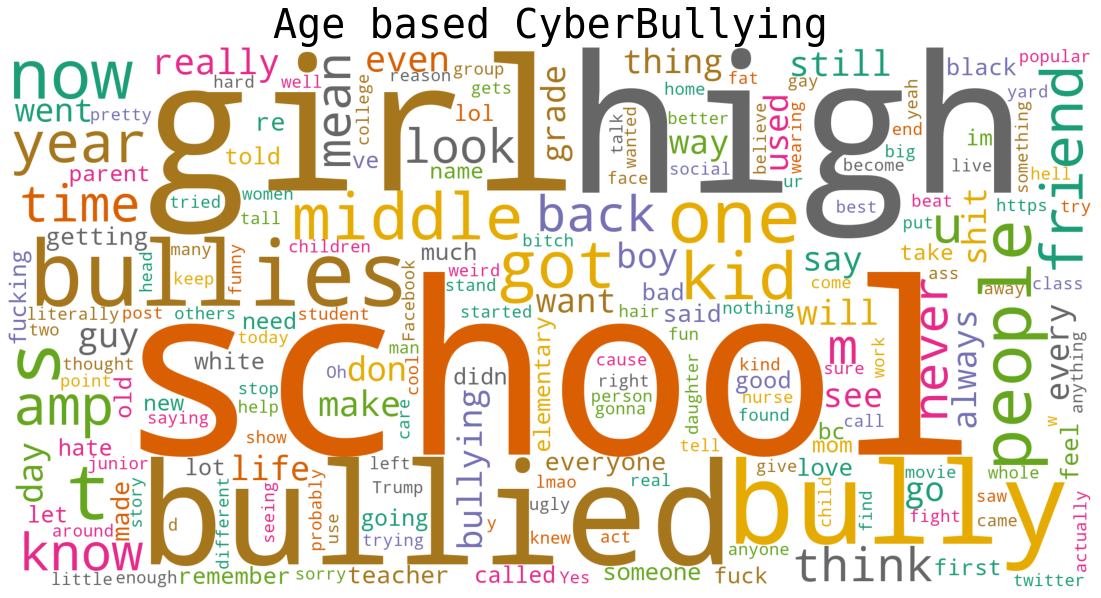

In [ ]:
plt.figure(figsize=(20,10))
subset_age = data[data['cyberbullying_type']=='age']
text_of_age = subset_age.tweet_text.values
word_cloud=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2001,height=1001).generate(" ".join(text_of_age))
plt.axis('off')
plt.title("Age based CyberBullying",fontsize=40)
plt.imshow(word_cloud)

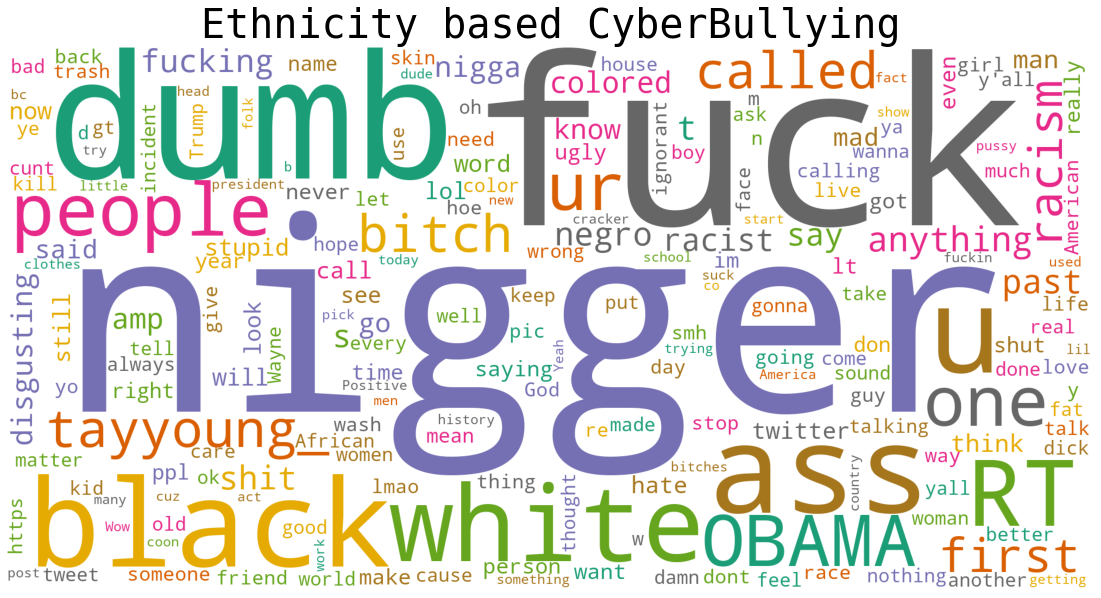

In [ ]:
plt.figure(figsize=(20,10))
subset_ethnicity = data[data['cyberbullying_type']=='ethnicity']
text_of_ethnicity = subset_ethnicity.tweet_text.values
word_cloud=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2001,height=1001).generate(" ".join(text_of_ethnicity))
plt.axis('off')
plt.title("Ethnicity based CyberBullying",fontsize=40)
plt.imshow(word_cloud)

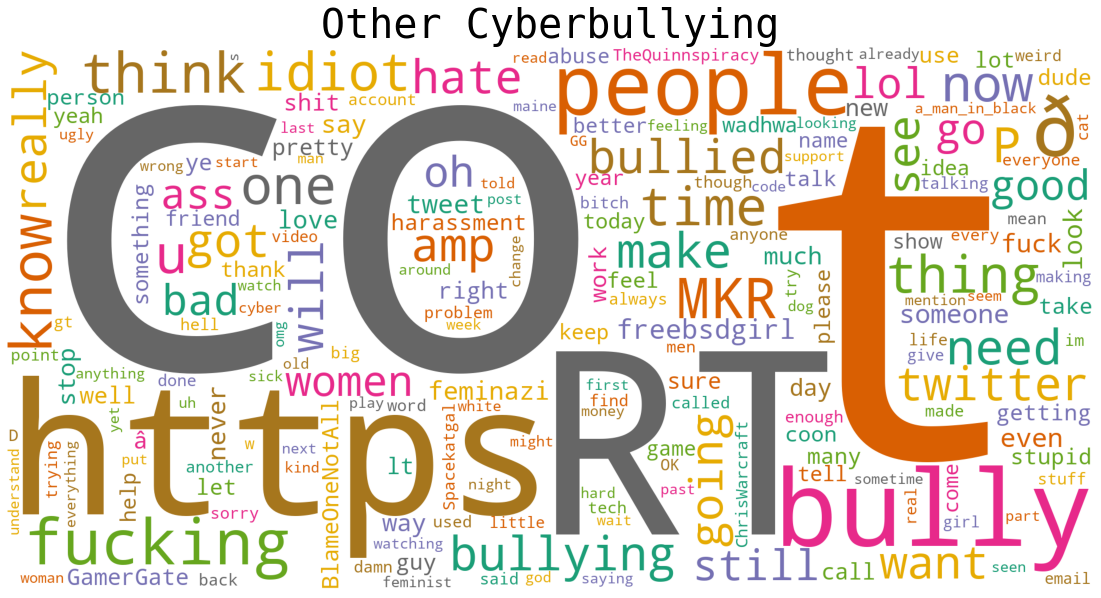

In [ ]:
plt.figure(figsize=(20,10))
subset_other_cyberbullying = data[data['cyberbullying_type']=='other_cyberbullying']
text_of_other_cyberbullying = subset_other_cyberbullying.tweet_text.values
word_cloud=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2001,height=1001).generate(" ".join(text_of_other_cyberbullying))
plt.axis('off')
plt.title("Other Cyberbullying",fontsize=40)
plt.imshow(word_cloud)

## Label Encoding

In [ ]:
ENCODE_DICT = {'not_cyberbullying': 0,
            'gender': 1,
            'religion': 2,
             'other_cyberbullying': 3,
            'age': 4,
            'ethnicity': 5}
data['labels'] = data.cyberbullying_type.replace(ENCODE_DICT)
print(data.labels.unique())
data.sample(3)

[0 1 2 3 4 5]


,tweet_text,cyberbullying_type,text,labels
2503,From the looks of my Twitter feed this morning...,not_cyberbullying,looks twitter feed morning made relevant first...,0
13392,RT @RyanD_18 Call me sexist but I hate hearing...,gender,rt call sexist hate hearing female rappers swi...,1
42056,"LOL, Christianity is the one establishing bina...",ethnicity,lol christianity one establishing binary conce...,5


In [ ]:
data.labels.value_counts()

2    7998
4    7992
1    7973
5    7961
0    7945
3    7823
Name: labels, dtype: int64

In [ ]:
data.drop(["tweet_text","cyberbullying_type"], axis=1,inplace=True)

In [ ]:
data.head()

,text,labels
0,words food crapilicious,0
1,white,0
2,classy whore red velvet cupcakes,0
3,meh p thanks heads concerned another angry dud...,0
4,isis account pretending kurdish account like i...,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47692 non-null  object
 1   labels  47692 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 745.3+ KB


## Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=vocab_size,lower=True,oov_token="<OOV>")
tokenizer.fit_on_texts(data["text"])
word_index=tokenizer.word_index
X= tokenizer.texts_to_sequences(data["text"])
max_length = 25
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(X, max_length, padding ="post", truncating ="post")


## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded,data["labels"], test_size=0.3)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.utils import to_categorical
enc = OrdinalEncoder()
y_train,y_test = to_categorical(enc.fit_transform(X=y_train.to_frame()),num_classes=6),to_categorical(enc.fit_transform(X=y_test.to_frame()),num_classes=6)

In [ ]:
print("Original Sendences :",data.text[14])
print()
print("After Tokenizer:", X[14])
print()
print("After Padding:",x_train[14])


Original Sendences : love best response hotcakes managed film noncommittal meh adolescent

After Tokenizer: [70, 202, 667, 9797, 2918, 1481, 20287, 3762, 20288]

After Padding: [ 5848  4934  2309  1574    51  7153 16581   689   336  2858  1125   336
  6196 14189   146   553   320    94  2303   475    94    94     0     0
     0]


In [ ]:
y_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

## Simple RNN 

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dense, SimpleRNN
import tensorflow as tf

In [ ]:
embedding_dim = 150
modelRnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.SimpleRNN(124, activation='tanh',dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
modelRnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 150)           7047750   
                                                                 
 simple_rnn (SimpleRNN)      (None, 124)               34100     
                                                                 
 dropout (Dropout)           (None, 124)               0         
                                                                 
 dense (Dense)               (None, 6)                 750       
                                                                 
Total params: 7,082,600
Trainable params: 7,082,600
Non-trainable params: 0
_________________________________________________________________


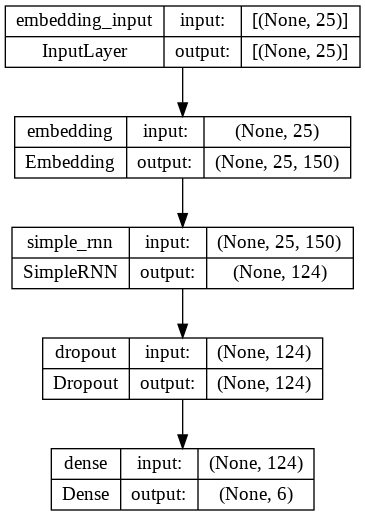

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(modelRnn, show_shapes=True)

In [ ]:
modelRnn.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy','AUC'])

In [ ]:
historyRnn = modelRnn.fit(x_train,y_train, epochs=10, validation_data = (x_test,y_test))

Epoch 1/10
1044/1044 [==============================] - 48s 44ms/step - loss: 1.0843 - accuracy: 0.5746 - auc: 0.8809 - val_loss: 1.5365 - val_accuracy: 0.5750 - val_auc: 0.8855
Epoch 2/10
1044/1044 [==============================] - 44s 42ms/step - loss: 0.7538 - accuracy: 0.7082 - auc: 0.9406 - val_loss: 0.7584 - val_accuracy: 0.7290 - val_auc: 0.9418
Epoch 3/10
1044/1044 [==============================] - 44s 42ms/step - loss: 0.6899 - accuracy: 0.7313 - auc: 0.9489 - val_loss: 1.1378 - val_accuracy: 0.6318 - val_auc: 0.8881
Epoch 4/10
1044/1044 [==============================] - 45s 43ms/step - loss: 0.6891 - accuracy: 0.7296 - auc: 0.9491 - val_loss: 0.7162 - val_accuracy: 0.7315 - val_auc: 0.9491
Epoch 5/10
1044/1044 [==============================] - 43s 42ms/step - loss: 0.6779 - accuracy: 0.7383 - auc: 0.9509 - val_loss: 0.7469 - val_accuracy: 0.7168 - val_auc: 0.9400
Epoch 6/10
1044/1044 [==============================] - 43s 41ms/step - loss: 0.6456 - accuracy: 0.7435 - auc:

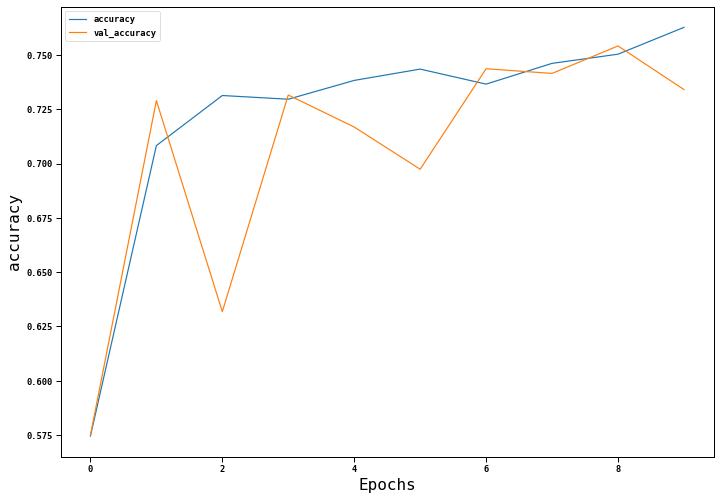

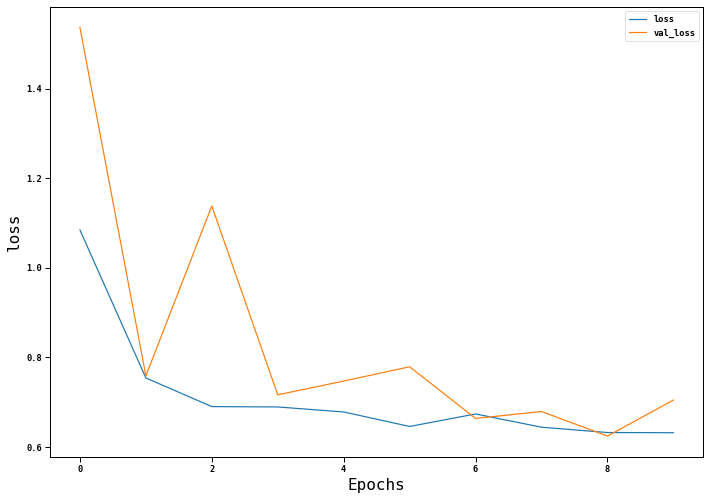

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
    plt.rc('font', **font)
    fig , ax = plt.subplots()
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs",fontsize=16)
    plt.ylabel(string,fontsize=16)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(historyRnn, 'accuracy')
plot_graphs(historyRnn, 'loss')

#### SimpleRNN Testing

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

2

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
import numpy as np
ypreds = np.argmax(modelRnn.predict(x_test),axis=1)
from sklearn.metrics import classification_report
print(classification_report(ypreds,rounded_labels,target_names=ENCODE_DICT))

448/448 [==============================] - 2s 3ms/step
                     precision    recall  f1-score   support

  not_cyberbullying       0.77      0.42      0.54      4319
             gender       0.77      0.83      0.80      2241
           religion       0.93      0.92      0.92      2479
other_cyberbullying       0.00      0.33      0.00         9
                age       0.96      0.92      0.94      2477
          ethnicity       0.96      0.81      0.88      2783

           accuracy                           0.73     14308
          macro avg       0.73      0.71      0.68     14308
       weighted avg       0.87      0.73      0.78     14308



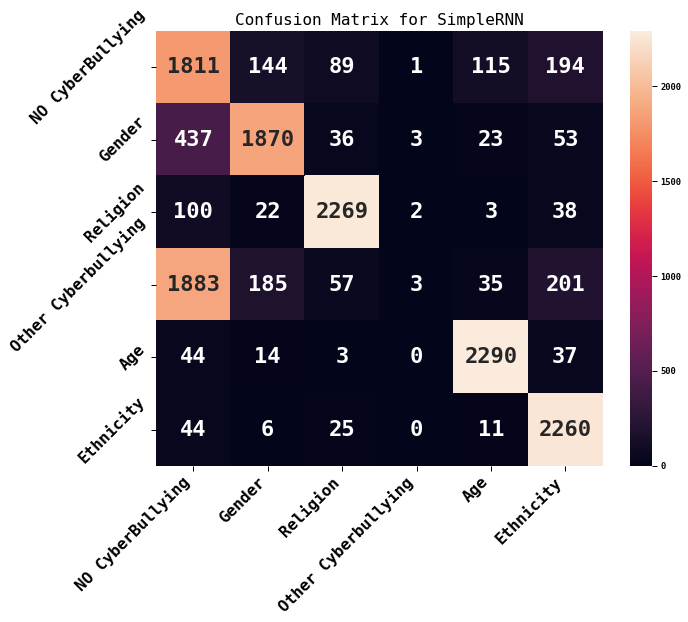

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, ypreds)    
plt.subplots(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax); 
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SimpleRNN',fontsize=16); 
plt.xticks(rotation=45, ha='right',fontsize=16)
plt.yticks(rotation=45,ha='right',fontsize=16)
ax.xaxis.set_ticklabels(['NO CyberBullying','Gender','Religion','Other Cyberbullying','Age','Ethnicity']);
ax.yaxis.set_ticklabels(['NO CyberBullying','Gender','Religion','Other Cyberbullying','Age','Ethnicity']);

In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy for SimpleRNN: {:.2f}\n'.format(accuracy_score(y_test, ypreds)))


Accuracy for SimpleRNN: 0.73



# Long Short Term Model (LSTM)

In [ ]:
modelLstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh')),
    #tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
modelLstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 25, 150)           7047750   
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              110080    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
Total params: 7,158,604
Trainable params: 7,158,604
Non-trainable params: 0
_________________________________________________________________


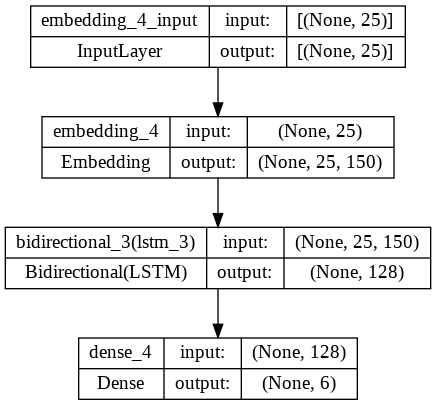

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(modelLstm, show_shapes=True)

In [ ]:
modelLstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

In [ ]:
history_lstm = modelLstm.fit(x_train,y_train, epochs=10, validation_data = (x_test,y_test))

Epoch 1/10
1044/1044 [==============================] - 18s 14ms/step - loss: 0.5655 - accuracy: 0.7508 - auc: 0.9666 - val_loss: 0.4414 - val_accuracy: 0.8135 - val_auc: 0.9788
Epoch 2/10
1044/1044 [==============================] - 14s 13ms/step - loss: 0.3256 - accuracy: 0.8652 - auc: 0.9882 - val_loss: 0.4708 - val_accuracy: 0.8114 - val_auc: 0.9766
Epoch 3/10
1044/1044 [==============================] - 14s 13ms/step - loss: 0.2200 - accuracy: 0.9108 - auc: 0.9942 - val_loss: 0.5558 - val_accuracy: 0.7933 - val_auc: 0.9711
Epoch 4/10
1044/1044 [==============================] - 14s 13ms/step - loss: 0.1701 - accuracy: 0.9272 - auc: 0.9964 - val_loss: 0.6588 - val_accuracy: 0.7942 - val_auc: 0.9634
Epoch 5/10
1044/1044 [==============================] - 14s 13ms/step - loss: 0.1386 - accuracy: 0.9372 - auc: 0.9975 - val_loss: 0.7492 - val_accuracy: 0.7852 - val_auc: 0.9556
Epoch 6/10
1044/1044 [==============================] - 14s 13ms/step - loss: 0.1202 - accuracy: 0.9431 - auc:

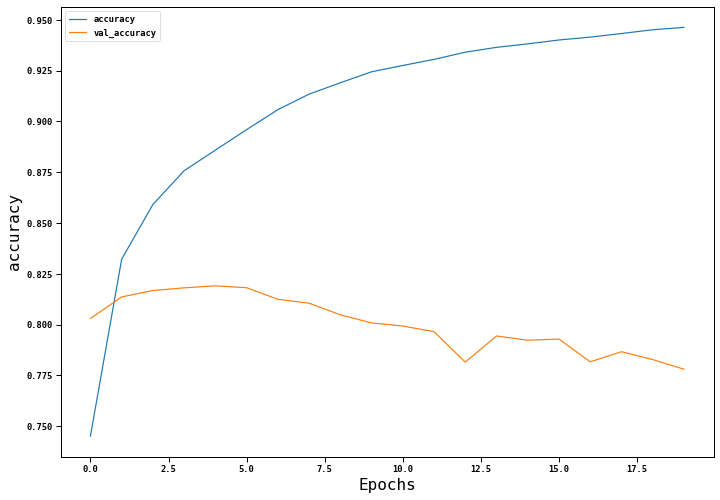

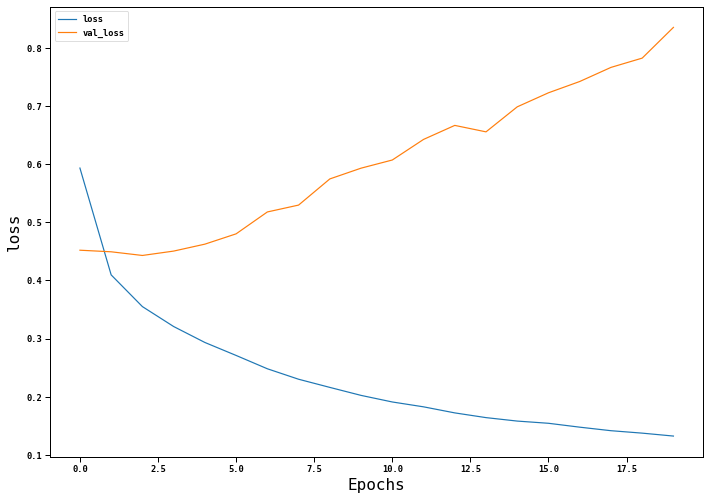

In [ ]:

plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

#### LSTM Model Testing

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

5

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
import numpy as np
ypreds = np.argmax(modelLstm.predict(x_test),axis=1)
from sklearn.metrics import classification_report
print(classification_report(ypreds,rounded_labels,target_names=ENCODE_DICT))

448/448 [==============================] - 2s 3ms/step
                     precision    recall  f1-score   support

  not_cyberbullying       0.47      0.50      0.48      2266
             gender       0.79      0.83      0.81      2249
           religion       0.93      0.93      0.93      2473
other_cyberbullying       0.57      0.51      0.54      2619
                age       0.95      0.96      0.96      2389
          ethnicity       0.95      0.96      0.95      2312

           accuracy                           0.78     14308
          macro avg       0.78      0.78      0.78     14308
       weighted avg       0.78      0.78      0.78     14308



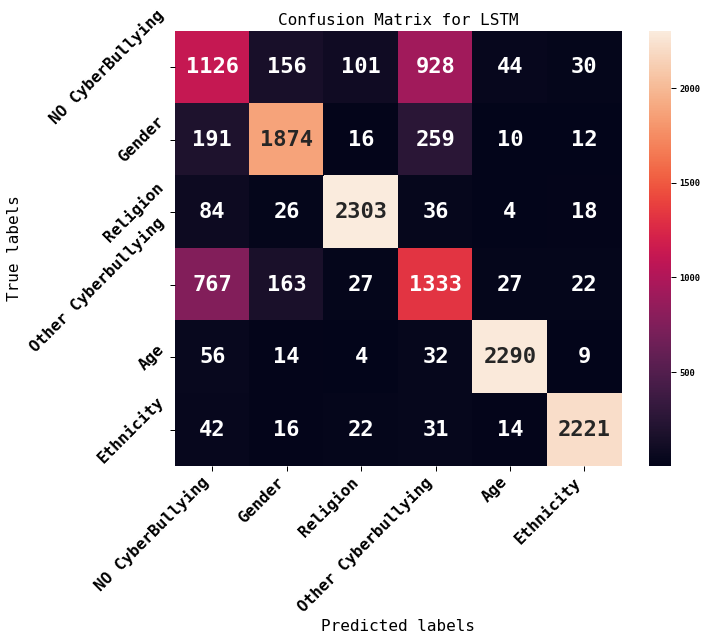

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, ypreds)    
plt.subplots(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels',fontsize=16);
ax.set_ylabel('True labels',fontsize=16); 
plt.xticks(rotation=45, ha='right',fontsize=16)
plt.yticks(rotation=45,ha='right',fontsize=16)
ax.set_title('Confusion Matrix for LSTM',fontsize=16); 
ax.xaxis.set_ticklabels(['NO CyberBullying','Gender','Religion','Other Cyberbullying','Age','Ethnicity']);
ax.yaxis.set_ticklabels(['NO CyberBullying','Gender','Religion','Other Cyberbullying','Age','Ethnicity']);

In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy for LSTM: {:.2f}\n'.format(accuracy_score(y_test, ypreds)))


Accuracy for LSTM: 0.78



# Gated Recurrent Unit (GRU)

In [ ]:
modelGru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,activation='tanh')),
    tf.keras.layers.Dense(6, activation='softmax')
])
modelGru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 25, 150)           7047750   
                                                                 
 bidirectional_6 (Bidirectio  (None, 128)              82944     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                                 
Total params: 7,131,468
Trainable params: 7,131,468
Non-trainable params: 0
_________________________________________________________________


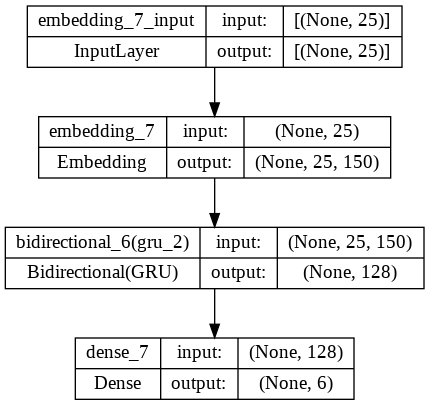

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(modelGru, show_shapes=True)

In [ ]:
modelGru.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy','AUC'])

In [ ]:
history_gru = modelGru.fit(x_train,y_train, epochs=10, validation_data = (x_test,y_test))

Epoch 1/10
1044/1044 [==============================] - 17s 14ms/step - loss: 0.5684 - accuracy: 0.7568 - auc: 0.9664 - val_loss: 0.4387 - val_accuracy: 0.8144 - val_auc: 0.9790
Epoch 2/10
1044/1044 [==============================] - 13s 13ms/step - loss: 0.3205 - accuracy: 0.8712 - auc: 0.9885 - val_loss: 0.4915 - val_accuracy: 0.8035 - val_auc: 0.9748
Epoch 3/10
1044/1044 [==============================] - 14s 13ms/step - loss: 0.2170 - accuracy: 0.9109 - auc: 0.9944 - val_loss: 0.5489 - val_accuracy: 0.7972 - val_auc: 0.9711
Epoch 4/10
1044/1044 [==============================] - 14s 13ms/step - loss: 0.1668 - accuracy: 0.9307 - auc: 0.9966 - val_loss: 0.6365 - val_accuracy: 0.7861 - val_auc: 0.9648
Epoch 5/10
1044/1044 [==============================] - 14s 13ms/step - loss: 0.1365 - accuracy: 0.9387 - auc: 0.9976 - val_loss: 0.7191 - val_accuracy: 0.7858 - val_auc: 0.9594
Epoch 6/10
1044/1044 [==============================] - 14s 13ms/step - loss: 0.1174 - accuracy: 0.9436 - auc:

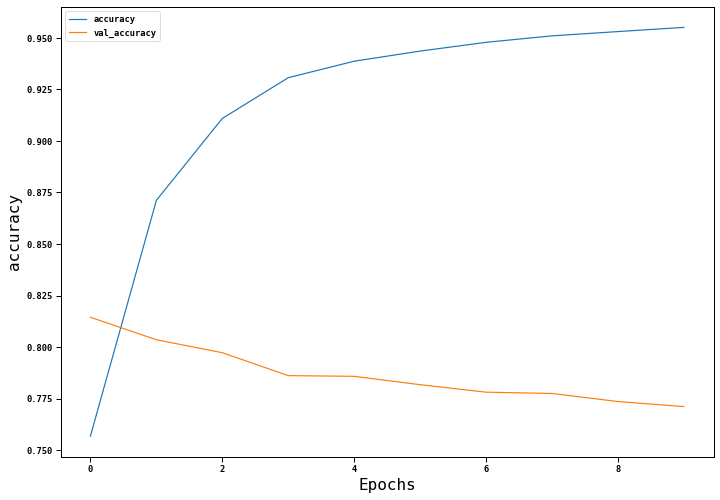

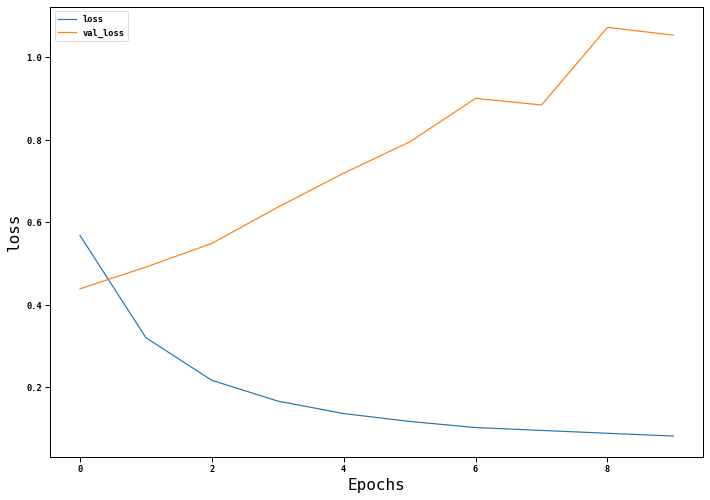

In [ ]:
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

#### GRU Testing

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

3

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
import numpy as np
ypreds = np.argmax(modelGru.predict(x_test),axis=1)
from sklearn.metrics import classification_report
print(classification_report(ypreds,rounded_labels,target_names=ENCODE_DICT))

448/448 [==============================] - 2s 3ms/step
                     precision    recall  f1-score   support

  not_cyberbullying       0.44      0.49      0.46      2156
             gender       0.80      0.80      0.80      2427
           religion       0.94      0.89      0.91      2542
other_cyberbullying       0.51      0.51      0.51      2370
                age       0.96      0.95      0.95      2382
          ethnicity       0.96      0.95      0.96      2431

           accuracy                           0.77     14308
          macro avg       0.77      0.76      0.77     14308
       weighted avg       0.78      0.77      0.77     14308



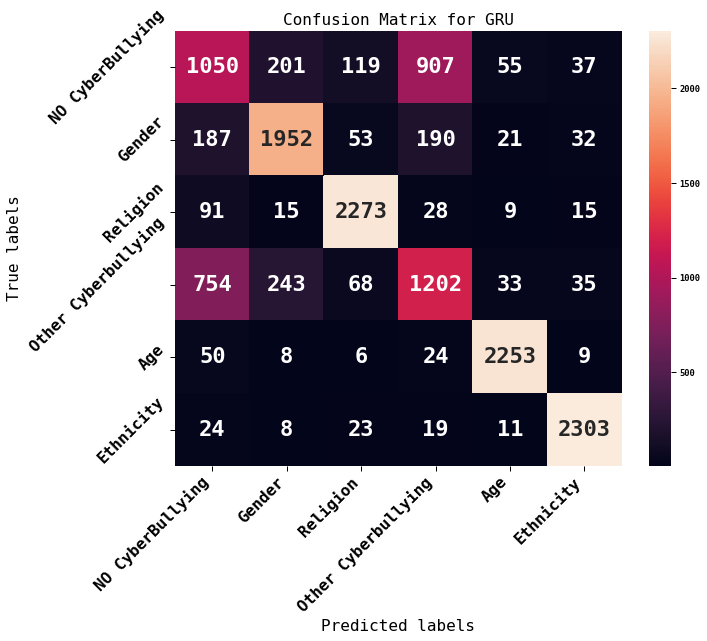

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, ypreds)    
plt.subplots(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels',fontsize=16);
ax.set_ylabel('True labels',fontsize=16); 
ax.set_title('Confusion Matrix for GRU',fontsize=16);
plt.xticks(rotation=45, ha='right',fontsize=16)
plt.yticks(rotation=45,ha='right',fontsize=16) 
ax.xaxis.set_ticklabels(['NO CyberBullying','Gender','Religion','Other Cyberbullying','Age','Ethnicity']);
ax.yaxis.set_ticklabels(['NO CyberBullying','Gender','Religion','Other Cyberbullying','Age','Ethnicity']);

In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy for GRU: {:.2f}\n'.format(accuracy_score(y_test, ypreds)))


Accuracy for GRU: 0.77



# Hybrid Model (CNN & LSTM)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Conv1D,MaxPooling1D,Activation, Flatten


embedding_dim = 150
model_hybrid1 = Sequential()
model_hybrid1.add(Embedding(vocab_size, embedding_dim,input_length=max_length))
model_hybrid1.add(tf.keras.layers.Dropout(rate=0.2))
model_hybrid1.add(Conv1D(filters=64, kernel_size=8, padding='same', activation='relu'))
model_hybrid1.add(MaxPooling1D(pool_size=2))
model_hybrid1.add(Conv1D(filters=32, kernel_size=6, padding='same', activation='relu'))
model_hybrid1.add(MaxPooling1D(pool_size=2))
model_hybrid1.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
model_hybrid1.add(MaxPooling1D(pool_size=2))
model_hybrid1.add(LSTM(64,activation='relu',dropout=0.2, recurrent_dropout=0.2))
model_hybrid1.add(tf.keras.layers.Dropout(rate=0.2))
model_hybrid1.add(Dense(34, activation='relu'))
model_hybrid1.add(Dense(16, activation='relu'))
model_hybrid1.add(Dense(10, activation='relu'))
model_hybrid1.add(Dense(6, activation='softmax'))
model_hybrid1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy','AUC'])
print(model_hybrid1.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 25, 150)           7047750   
                                                                 
 dropout_12 (Dropout)        (None, 25, 150)           0         
                                                                 
 conv1d_12 (Conv1D)          (None, 25, 64)            76864     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 12, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 12, 32)            12320     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 6, 32)            0         
 g1D)                                                

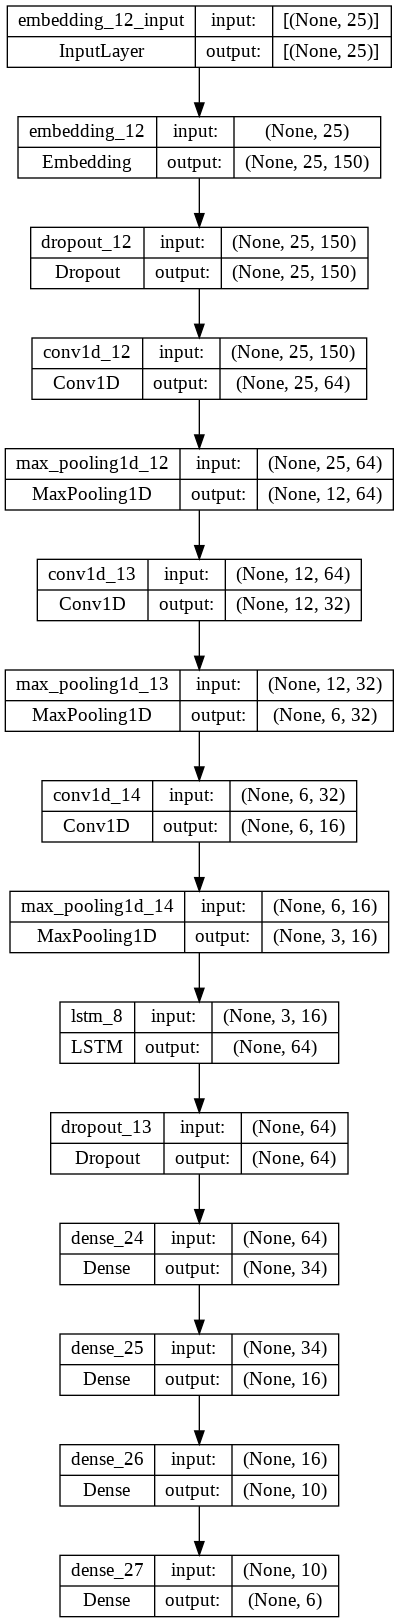

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model_hybrid1, show_shapes=True)

In [ ]:
history_hybrid1 =model_hybrid1.fit(x_train,y_train, epochs=10, validation_data = (x_test,y_test))

Epoch 1/10
1044/1044 [==============================] - 29s 24ms/step - loss: 0.9977 - accuracy: 0.5812 - auc: 0.9006 - val_loss: 0.6009 - val_accuracy: 0.7405 - val_auc: 0.9639
Epoch 2/10
1044/1044 [==============================] - 26s 25ms/step - loss: 0.5383 - accuracy: 0.7736 - auc: 0.9697 - val_loss: 0.5337 - val_accuracy: 0.7777 - val_auc: 0.9705
Epoch 3/10
1044/1044 [==============================] - 27s 25ms/step - loss: 0.4797 - accuracy: 0.8073 - auc: 0.9759 - val_loss: 0.5025 - val_accuracy: 0.7942 - val_auc: 0.9734
Epoch 4/10
1044/1044 [==============================] - 25s 24ms/step - loss: 0.4226 - accuracy: 0.8399 - auc: 0.9812 - val_loss: 0.5555 - val_accuracy: 0.7905 - val_auc: 0.9709
Epoch 5/10
1044/1044 [==============================] - 25s 24ms/step - loss: 0.3839 - accuracy: 0.8620 - auc: 0.9845 - val_loss: 0.5423 - val_accuracy: 0.8009 - val_auc: 0.9722
Epoch 6/10
1044/1044 [==============================] - 24s 23ms/step - loss: 0.3449 - accuracy: 0.8795 - auc:

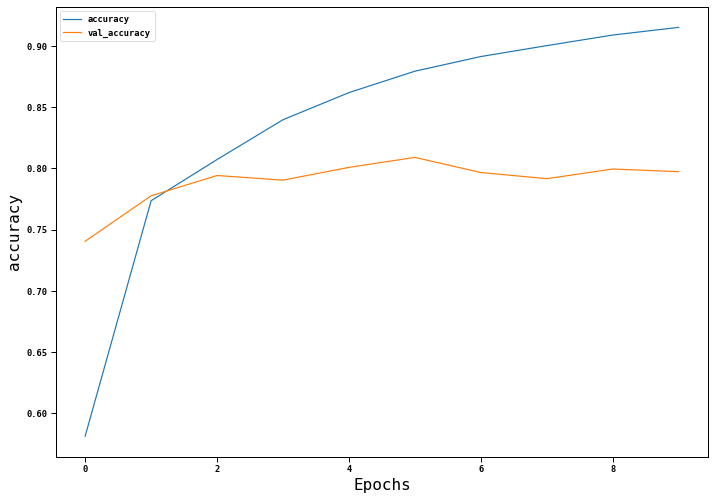

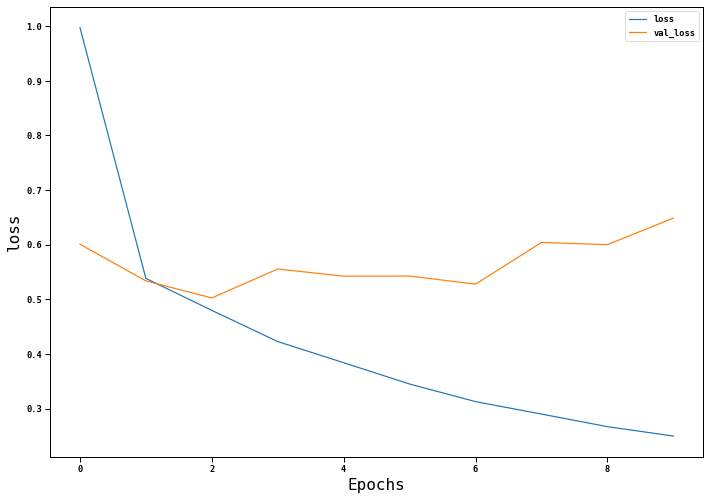

In [ ]:

plot_graphs(history_hybrid1, 'accuracy')
plot_graphs(history_hybrid1, 'loss')

In [ ]:
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

In [ ]:
import numpy as np
ypreds = np.argmax(model_hybrid1.predict(x_test),axis=1)
from sklearn.metrics import classification_report
print(classification_report(ypreds,rounded_labels,target_names=ENCODE_DICT))

448/448 [==============================] - 2s 3ms/step
                     precision    recall  f1-score   support

  not_cyberbullying       0.42      0.55      0.48      1839
             gender       0.85      0.78      0.82      2540
           religion       0.93      0.96      0.94      2330
other_cyberbullying       0.67      0.54      0.59      2891
                age       0.95      0.98      0.97      2346
          ethnicity       0.96      0.98      0.97      2362

           accuracy                           0.80     14308
          macro avg       0.80      0.80      0.80     14308
       weighted avg       0.81      0.80      0.80     14308



In [ ]:
y_test = np.argmax(y_test, axis=1)

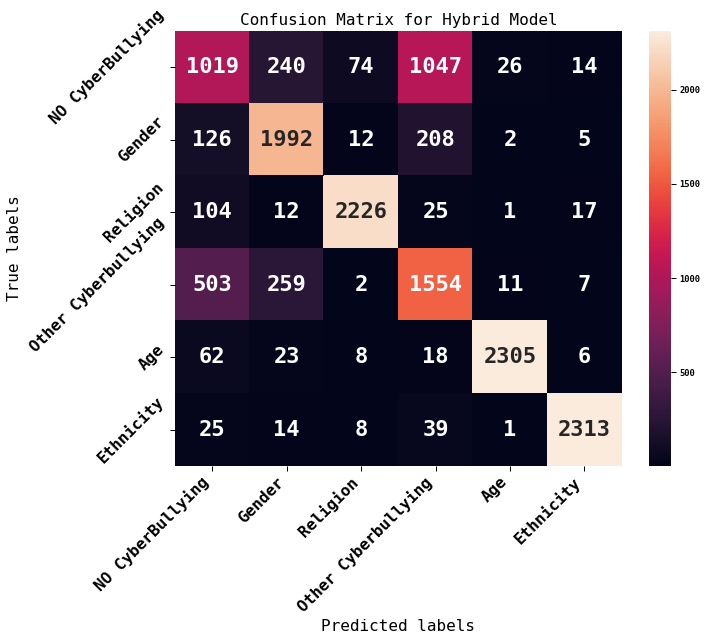

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, ypreds)    
plt.subplots(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax); 
ax.set_xlabel('Predicted labels',fontsize=16);
ax.set_ylabel('True labels',fontsize=16); 
ax.set_title('Confusion Matrix for Hybrid Model',fontsize=16);
plt.xticks(rotation=45, ha='right',fontsize=16)
plt.yticks(rotation=45,ha='right',fontsize=16) 
ax.xaxis.set_ticklabels(['NO CyberBullying','Gender','Religion','Other Cyberbullying','Age','Ethnicity']);
ax.yaxis.set_ticklabels(['NO CyberBullying','Gender','Religion','Other Cyberbullying','Age','Ethnicity']);

In [ ]:
from sklearn.metrics import accuracy_score
print('\nAccuracy for hybrid: {:.2f}\n'.format(accuracy_score(y_test, ypreds)))


Accuracy for hybrid: 0.80



### Testing the Model

In [ ]:
from keras.models import load_model
model_hybrid1.save('cyberbuylling.h5')
model_hybrid = load_model('cyberbuylling.h5')

def predict_class(text):
    labels = ['NO CyberBullying','Gender','Religion','Other Cyberbullying','Age','Ethnicity']
    maxlen=max_length
    xt = tokenizer.texts_to_sequences(text)
    xt = pad_sequences(xt, padding='post', maxlen=max_length)
    yt = model_hybrid1.predict(xt).argmax(axis=1)
    print()
    print('The CyberBullying Type is : ',labels[yt[0]])
    print()

In [ ]:
predict_class(["rebecca black drops school due to bullying"])

1/1 [==============================] - 0s 17ms/step

The CyberBullying Type is :  NO CyberBullying



### Conclusion

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Model', 'Accuracy','Precision','Recall','F1-score']
table.add_row(['Simple RNN', 73,73,71,68])
table.add_row(['LSTM', 78,78,78,78])
table.add_row(['GRU', 77,77,76,77])
table.add_row(['Hybrid Model (CNN-LSTM)', 80,81,80,80])
print(table)

+-------------------------+----------+-----------+--------+----------+
|          Model          | Accuracy | Precision | Recall | F1-score |
+-------------------------+----------+-----------+--------+----------+
|        Simple RNN       |    73    |     73    |   71   |    68    |
|           LSTM          |    78    |     78    |   78   |    78    |
|           GRU           |    77    |     77    |   76   |    77    |
| Hybrid Model (CNN-LSTM) |    80    |     81    |   80   |    80    |
+-------------------------+----------+-----------+--------+----------+
